In [1]:
#importer le fichier csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/Checkpoint 4/kc_house_data.csv"
df=pd.read_csv(path, encoding="UTF-8", sep=',')
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Question 1 :

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [4]:
df.isnull().sum()
#Aucune erreur détectée

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df['waterfront'].value_counts()


0    21450
1      163
Name: waterfront, dtype: int64

In [8]:
df['grade'].value_counts()


7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [9]:
df['condition'].value_counts()


3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

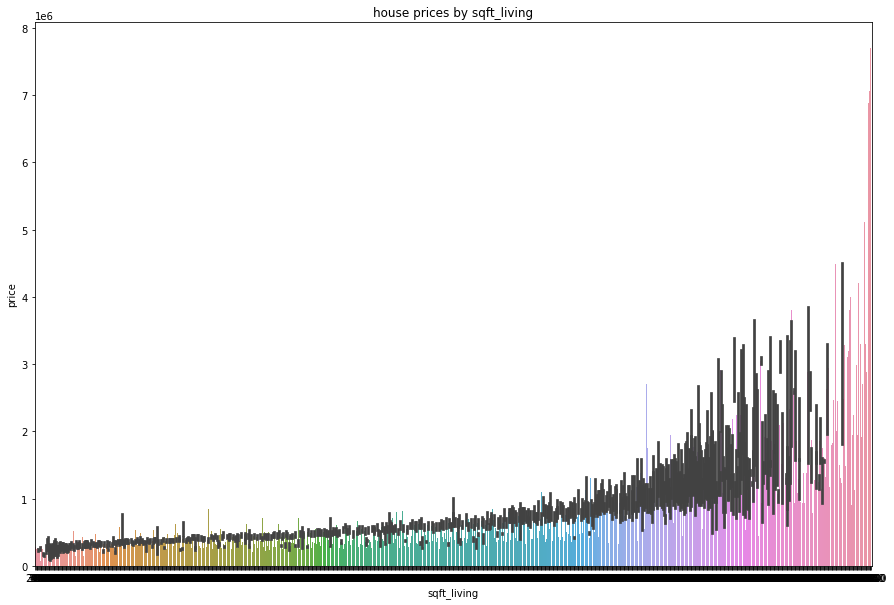

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
sns.barplot(x='sqft_living',y='price',data=df)

#creating bar plot to see how the prices change with sqft_living

In [11]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode())

Mean 2079.9
Median 1910.0
Mode 0    1300
dtype: int64


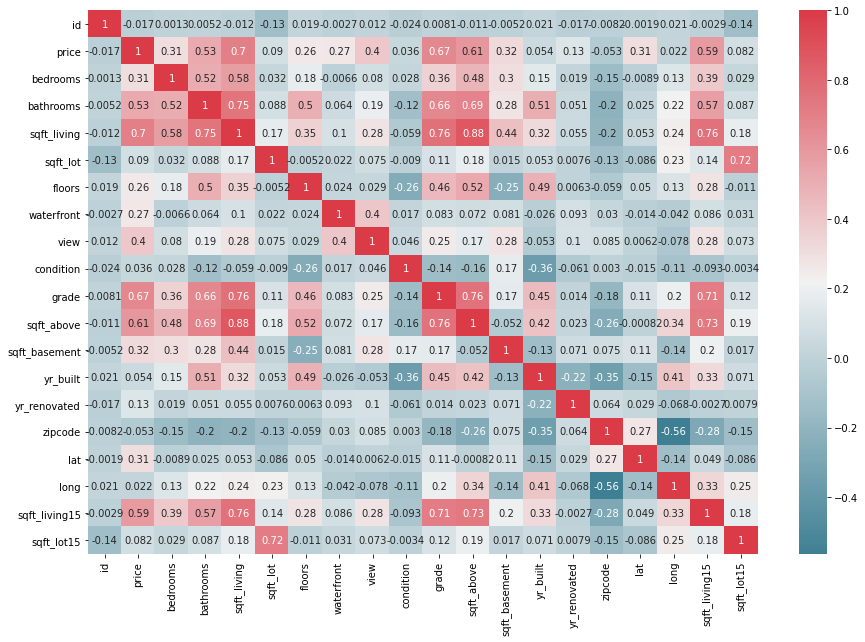

In [12]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

# Question 2 :

According to the previous heatmap, the most important features are the ones with a >0.5 rate. Therefore, for the features selection step, we can choose bathrooms, sqft_living, grade, sqft_above and sqft_living15 and view but it's not oblige (0,4). 

# Question 3 :

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y=df["price"]
x=df["sqft_living"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=30)

# Question 4 :

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [46]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Question 5 :

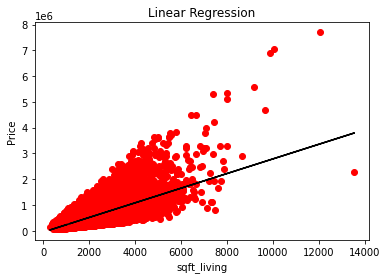

In [47]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [48]:
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


# Question 6 :

In [49]:
x=df[["sqft_living","sqft_above"]]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 62831668851.97097
R squared 0.5002155345241335


We can see here that the multi linear regression has a smaller MSE than the linear regression one. This model is better.

In [39]:
#extract x and y from our data
X=df [["sqft_living","sqft_above"]] #we have more than one input
y=df["price"]  
import statsmodels.formula.api as smf
model=smf.ols(formula="price ~ sqft_living + sqft_above", data=df)
results_formula=model.fit()
results_formula.params

Intercept     -40859.960953
sqft_living      295.503741
sqft_above       -18.827011
dtype: float64

In [40]:
x_surf, y_surf = np.meshgrid(np.linspace(df.sqft_living.min(), df.sqft_living.max(), 100),np.linspace(df.sqft_above.min(), df.sqft_above.max(), 100))
onlyX = pd.DataFrame({'sqft_living': x_surf.ravel(), 'sqft_above': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [41]:
## convert the predicted result in an array
fittedY=np.array(fittedY)

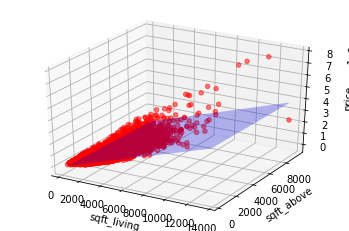

In [42]:
# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sqft_living'],df['sqft_above'],df['price'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_above')
ax.set_zlabel('price')
plt.show()

# Question 7 :

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=df [["sqft_living","sqft_above"]]
y=df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57232313805.9676
R squared:  0.5447547091125003


Once again, the MSE is lower than previous regressions. Moreover, the R squared coefficient is higher than 0.5 (which is stil bad but it's a higher coefficient than the others). This polynomial regression is definitely better than the others.